In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
RA_sources = np.array([5+30.0/60,5+32.0/60+0.4/3600,5+36.0/60+12.8/3600,5+40.0/60+45.5/3600])
DEC_sources = np.array([60,60+17.0/60+57.0/3600,61+12.0/60+6.9/3600,61+56.0/60+34.0/3600])
Flux_sources_labels = np.array(["","1 Jy","0.5 Jy","0.2 Jy"])
Flux_sources = np.array([1,0.5,0.1]) #in Jy
step_size = 200
print("Phase center     Source 1     Source 2     Source3")
print(repr("RA="+str(RA_sources)).ljust(2))
print("DEC="+str(DEC_sources))

Phase center     Source 1     Source 2     Source3
'RA=[5.5        5.53344444 5.60355556 5.67930556]'
DEC=[60.         60.29916667 61.20191667 61.94277778]


In [189]:
RA_rad = np.array(RA_sources)*(np.pi/12)
DEC_rad = np.array(DEC_sources)*(np.pi/180)
RA_delta_rad = RA_rad-RA_rad[0]

l = np.cos(DEC_rad)*np.sin(RA_delta_rad)
m = (np.sin(DEC_rad)*np.cos(DEC_rad[0])-np.cos(DEC_rad)*np.sin(DEC_rad[0])*np.cos(RA_delta_rad))
print("l=",l*(180/np.pi))
print("m=",m*(180/np.pi))

point_sources = np.zeros((len(RA_sources)-1,3))
point_sources[:,0] = Flux_sources
point_sources[:,1] = l[1:]
point_sources[:,2] = m[1:]

l= [0.         0.24855826 0.74818685 1.26458942]
m= [0.         0.30010768 1.21061225 1.96811494]


In [190]:
d_theta = (5/step_size)*(np.pi/180.0)
print(d_theta)
d_u = 1/(step_size*d_theta)
print(d_u)
u_extent = int(d_u*(step_size/2))
print(int(u_extent))

0.0004363323129985824
11.459155902616464
1145


In [191]:
u = np.linspace(-u_extent, u_extent, num=step_size, endpoint=True)
v = np.linspace(-u_extent, u_extent, num=step_size, endpoint=True)   
uu, vv = np.meshgrid(u, v)
zz = np.zeros(uu.shape).astype(complex)

In [192]:
s = point_sources.shape
#sigma = 0.05
sigma = 0.1
sigma = (np.pi / 180) * sigma
g_kernal = (2 * np.pi * sigma ** 2) * np.exp(-2 * np.pi ** 2 * sigma ** 2 * (uu ** 2 + vv ** 2))
for counter in range(1, s[0]+1):
    A_i = point_sources[counter-1,0]
    l_i = point_sources[counter-1,1]
    m_i = point_sources[counter-1,2]
    zz += A_i*np.exp(-2*np.pi*1j*(uu*l_i+vv*m_i))*g_kernal
zz = zz[:,::-1]

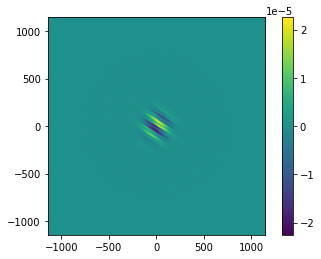

In [193]:
#plt.subplot(122)
fig, ax = plt.subplots()

im = ax.imshow(zz.imag,extent=[-u_extent, u_extent, -u_extent, u_extent])
fig.colorbar(im, ax=ax)


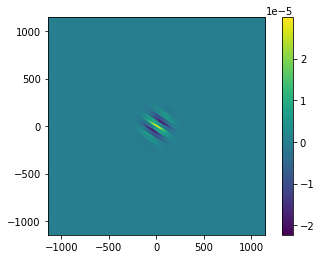

In [194]:
fig, ax = plt.subplots()

im = ax.imshow(zz.real,extent=[-u_extent, u_extent, -u_extent, u_extent])
fig.colorbar(im, ax=ax)


In [195]:
print(zz.shape[0])
zz = np.roll(zz, -int(zz.shape[0]/2), axis=0)
zz = np.roll(zz, -int(zz.shape[0]/2), axis=1)

zz_f = np.fft.fft2(zz) * (d_u*d_u)

200


0.9910192332389943


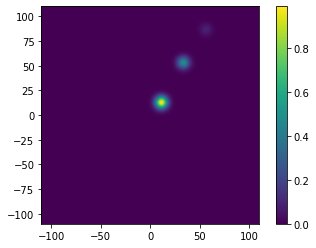

In [196]:
zz_f = np.roll(zz_f, 100, axis=0)
zz_f = np.roll(zz_f, 100, axis=1)

fig, ax = plt.subplots()

im = ax.imshow(zz_f.real,extent=[-1*(100)-10, 100+10,-1*(100)-10, \
                           100+10])
fig.colorbar(im, ax=ax)
print(np.max(zz_f.real))